In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [20]:
# Change the data in order to feed it to the model
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if str(x).strip().lower() == 'male' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if str(x).strip().lower() == 'y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

In [21]:
df = df.join(pd.get_dummies(df['BusinessTravel']).astype(bool)).drop('BusinessTravel',axis=1)
df = df.join(pd.get_dummies(df['Department'],prefix = 'Department').astype(bool)).drop('Department',axis=1)
df = df.join(pd.get_dummies(df['EducationField'],prefix = 'Education').astype(bool)).drop('EducationField',axis=1)
df = df.join(pd.get_dummies(df['JobRole'],prefix = 'Role').astype(bool)).drop('JobRole',axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'],prefix = 'Status').astype(bool)).drop('MaritalStatus',axis=1)

In [22]:
df = df.applymap(lambda x: 1 if x is True else 0 if x is False else x)

# Model Training

In [23]:
# We drop the attrition from the X since it is the target 
X, y = df.drop('Attrition', axis = 1), df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [24]:
# Use decision Trees classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
# Use the model to predict
y_pred = dt_model.predict(X_test)

In [26]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

#### Visualization of Results

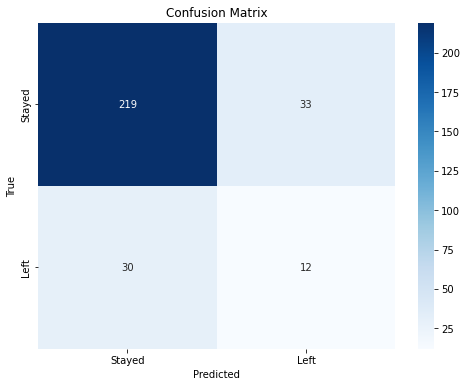

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Create a dataframe to summarize the predictions
predicted_counts = pd.Series(y_pred).value_counts().sort_index()
predicted_counts.index = ['Stay', 'Leave']

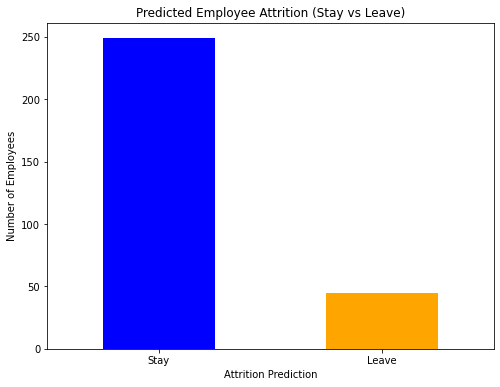

In [31]:
plt.figure(figsize=(8,6))
predicted_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Predicted Employee Attrition (Stay vs Leave)')
plt.xlabel('Attrition Prediction')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()